# 1) بررسی دیتاست نظرات کاربران سایت IMDB

In [2]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
# load the dataset
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

Using TensorFlow backend.


In [3]:
# خلاصه کردن اندازه رکوردها
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [4]:
# مشخص کردن تعداد کلاس ها
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [5]:
# مشخص کردن تعداد لغات منحصر بفرد
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


### میانگین طول نظرات (از چند واژه در هر نظر استفاده شده است)

Review length: 
Mean 234.76 words (172.911495)


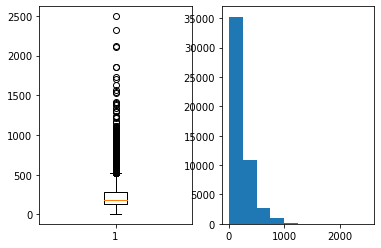

In [10]:
# محاسبه میانگین و انحراف استاندارد نظرات
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# رسم طول نظرات با نمودارهای جعبه ای و هیستاگرام
pyplot.subplot(121)
pyplot.boxplot(result)
pyplot.subplot(122)
pyplot.hist(result)
pyplot.show()

# 2) ساخت مدل شبکه عصبی MLP

In [11]:
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [12]:
seed = 7
numpy.random.seed(seed)

In [14]:
#Only Load the Top 5,000 words in the IMDB Review.
imdb.load_data(num_words=5000)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4

use the Keras utility to truncate or pad the dataset to a length of 500 for each observation using the sequence.pad sequences() function

In [15]:
X_train = sequence.pad_sequences(X_train, maxlen=500)
X_test = sequence.pad_sequences(X_test, maxlen=500)

In [16]:
#The output of this first layer would be a matrix with the size 32 * 500 for a given movie review training or test pattern in integer format
Embedding(5000, 32, input_length=500)

In [17]:
# استفاده از MLP برای حل مسئله IMDB
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# برای حفظ اعتبار مدل
seed = 7
numpy.random.seed(seed)

# با کار واژگان برتر
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print(model.summary())
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
verbose=1)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_1 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               4000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 4,160,501
Trainable params: 4,160,501
Non-trainable params: 0
_________________________________________________________________
None

Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 48s 2ms/step - loss: 0.5019 - accur

# ساخت مدل شبکه عصبی کانولوشنی یک بعدی

In [1]:
# CNN for the IMDB problem
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Convolution1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


Load, Split and Pad IMDB Dataset

In [2]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
test_split = 0.33
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=top_words)
# pad dataset to a maximum review length in words
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

C:\Users\ShahinN\Anaconda3\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


17465344/17464789 [==============================] - 324s 19us/step


In [4]:
# create the model
model = Sequential()
model.add(Embedding(top_words, 32, input_length= max_words))
model.add(Convolution1D(nb_filter=32, filter_length=3, border_mode= 'same' ,
            activation= 'relu' ))
model.add(MaxPooling1D(pool_length=2))
model.add(Flatten())
model.add(Dense(250, activation= 'relu' ))
model.add(Dense(1, activation= 'sigmoid' ))

C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=32, kernel_size=3, padding="same")`
  """
C:\Users\ShahinN\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=2)`
  


In [6]:
model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=['accuracy'])
print(model.summary())

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8000)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               2000250   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 251       
Total params: 2,163,605
Tr

In [7]:
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=2, batch_size=128,
            verbose=1)


Train on 25000 samples, validate on 25000 samples
Epoch 1/2
25000/25000 [==============================] - 133s 5ms/step - loss: 0.4304 - accuracy: 0.7744 - val_loss: 0.2730 - val_accuracy: 0.8852
Epoch 2/2
25000/25000 [==============================] - 147s 6ms/step - loss: 0.2033 - accuracy: 0.9224 - val_loss: 0.2690 - val_accuracy: 0.8876


In [10]:
#Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 88.76%
